Importujemy potrzebne biblioteki

In [1]:
%matplotlib inline
import numpy.fft as fft
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss

## Twierdzenie o splocie

<!--Na pierwszych ćwiczeniach poznaliśmy poznaliśmy operację [[Systemy_liniowe_niezmiennicze_w_czasie#Splot|splotu]] jako efekt działania systemu liniowego niezmienniczego w czasie. Poznaliśmy wówczas jego [[Systemy_liniowe_niezmiennicze_w_czasie#W.C5.82asno.C5.9Bci_splotu|własności]].
Okazuje się, że gdy rozważamy sprzężone ze sobą za pomocą transformaty Fouriera dziedziny czasu i częstości splot ma wiele wspólnego z mnożeniem. Związek ten można zapisać jako -->

Przypomnijmy sobie poznane na wykładzie 
<a href="https://brain.fuw.edu.pl/edu/index.php/Twierdzenia_o_splocie_i_o_pr%C3%B3bkowaniu_(aliasing)#Twierdzenie_o_splocie"> Twierdzenie o splocie</a> 

$
g(t)=\left(s * h\right)(t)\quad \Rightarrow \quad G(f)=S(f)\cdot H(f)
$

To twierdzenie działa też w drugą stronę:

$
G(f)=\left(S * H\right)(f)\quad \Rightarrow \quad g(t)=s(t)\cdot h(t)
$

W praktyce oznacza to tyle, że jeśli w jednej dziedzinie jakieś dwa sygnały przez siebie przemnożymy, to w drugiej dziedzinie transformaty tych sygnałów splatają się. Własność ta ma bardzo ważne konsekwencje, np. przy estymacji widma skończonego fragmentu sygnału. Dlaczego?

Wyobraźmy sobie, że mamy nieskończenie długi sygnał. Oprócz niego mamy też funkcję, która jest niezerowa tylko na skończonym odcinku. Funkcję taką będziemy nazywać oknem. Pobranie fragmentu sygnału można wyobrazić sobie jako efekt pomnożenia badanego sygnału przez okno. Ta operacja mnożenia w dziedzinie czasu, w dziedzinie częstości odpowiada splotowi widma sygnału z widmem okna. Aby uzyskać sygnał o skończonej długości odrzucamy wyzerowane odcinki. FFT widzi taki skończony odcinek jako  periodyczne przedłużenie.  Widać, że w praktyce estymowania widma zawsze mamy  do czynienia z widmami będącymi splotem widma sygnału i widma okna, ponieważ zawsze pracujemy z sygnałami o skończonej długości.

### Zastosowania
* pozwala na zamianę splotu na mnożenie

* daje wgląd w okienkowanie

* łatwiej można zrozumieć działanie filtrów


# Okienka
## Wstęp
* Jakie są dostępne okna w <tt>scipy.signal</tt>? Proszę odwiedzić stronę z [dokumentacją](http://docs.scipy.org/doc/scipy-0.14.0/reference/signal.html).
* Jak wyglądają te okienka?

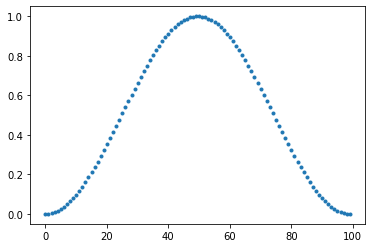

In [2]:
from scipy import signal
w = signal.hann(100)
plt.plot(w,'.')
plt.show()

## Badanie własności okien
### Zadanie 1: Własności różnych okien  i szerokość prążka w widmie
Widmo amplitudowe w skali dB sygnału $s$, jego transformata Fouriera $S$:

$ P_{dB} = 20*np.log10( abs(S) ) $

Proszę zwrócić uwagę na charakterystyczne elementy: szerokość piku głównego, szybkość zanikania listków bocznych, zera. 

Posługując się poniższym kodem (należy uzupełnić brakujące fragmenty kodu):

* Uzupełnij funckje pomocnicze do generowania widma:

In [3]:
def widmo_dB(s, N_fft, F_samp):
    '''
    funkcja pomocnicza do obliczania widma amplitudowego w skali decybelowej
    '''
    S = fft.rfft(s,N_fft)
    S_dB = 20*np.log10(np.abs(S))
    F = fft.rfftfreq(N_fft, 1/F_samp)
    return (S_dB,F)
    

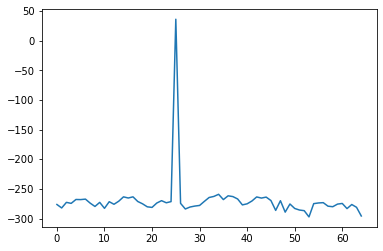

In [5]:
Fs = 128
t = np.arange(0,1,1/Fs)
s = np.sin(2*np.pi*25*t)

S_dB,F = widmo_dB(s, 128, Fs)

plt.plot(F,S_dB)
plt.show()

In [24]:
def rysuj_wlasnosci_okienka(s, okno, N_fft, F_samp,tytul):
    '''
    funkcja implementująca polecenia z zadania
    '''
    okno = np.ones(len(s))/np.sqrt(len(s)) # znormalizuj okienko
    s_okienkowany = s*okno # okienkujemy sygnał
    
    plt.figure(figsize=(15,12))
    plt.subplot(2,2,1)
    plt.plot(t,okno)
    plt.title(tytul)

    plt.subplot(2,2,2)
    #S_okienka_zera, skalaF_zera = widmo_dB(okno, len(okno), F_samp) # oblicz widmo okienka z dopełnieniem zerami do N_fft
    #plt.plot(skalaF_zera,S_okienka_zera)

    S_okienka, skalaF = widmo_dB(okno, len(okno), F_samp)# oblicz widmo okienka dla oryginalnej jego długości
    plt.plot(skalaF,S_okienka,'r.-')
    plt.title('widmo okienka')
    plt.ylim((-90,25))  
    
    plt.subplot(2,2,3)
    plt.plot(t,s_okienkowany)
    plt.title('sygnał okienkowany')
    
    plt.subplot(2,2,4)
    S_okienkowany_zera, skalaF_zera = widmo_dB(s_okienkowany, 1024, F_samp) # oblicz widmo sygnału okienkowanego z dopełnieniem zerami do 1024 
    S_okienkowany, skalaF =  widmo_dB(s_okienkowany, len(s_okienkowany), F_samp) # oblicz widmo sygnału okienkowanego dla oryginalnej jego długości
    plt.plot(skalaF_zera,S_okienkowany_zera)
    plt.plot(skalaF,S_okienkowany,'r.-')
    plt.plot([f,f],[-90,25],'r')
    plt.ylim((-90,25))
    plt.title('widmo sygnału okienkowanego')

Wygeneruj sinusoidę o częstości $f=10.2$ Hz fazie 0, czasie trwania $T=1$ s, i częstości próbkowania $Fs=100$ Hz

In [25]:
Fs = 100
dt = 1/Fs
T = 1
f = 10.2
t = np.arange(0,T,dt)

s = np.sin(2*np.pi*f*t)

Wygeneruj okno prostokątne o długości równej długości sinusoidy, a następnie wyrysuj własności okienka przy pomocy funkcji `rysuj_wlasnosci_okienka`

<ipython-input-3-b3c30888b616>:6: RuntimeWarning: divide by zero encountered in log10
  S_dB = 20*np.log10(np.abs(S))


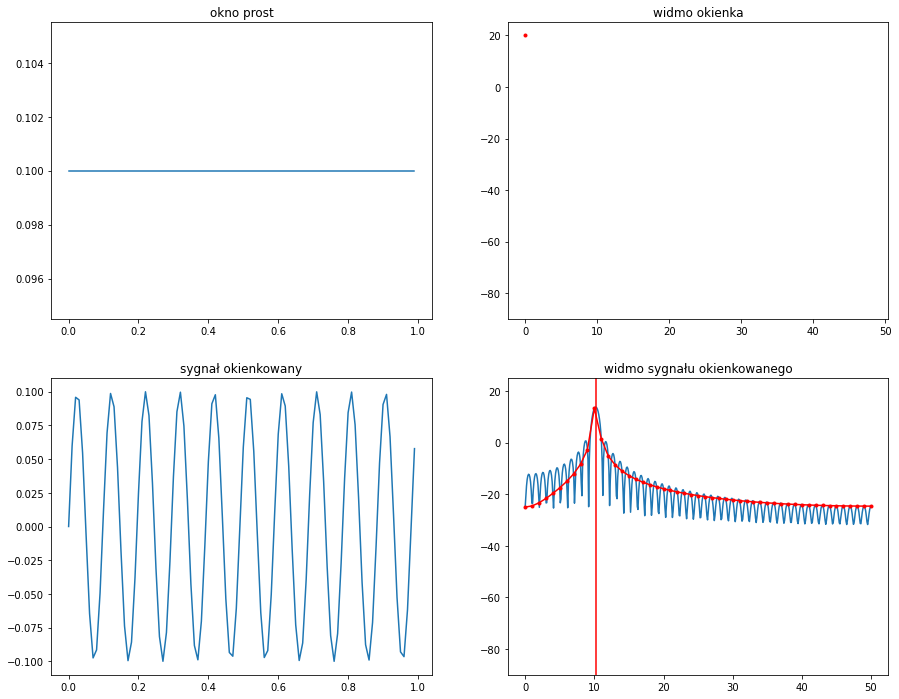

In [31]:
rysuj_wlasnosci_okienka(s, okno, 128, Fs, "okno prost")

Zokienkuj sygnał mnożąc sinusoidę przez unormowane okienko

* Wykreśl zokienkowany sygnał, widmo zokienkowanego sygnału, widmo okienka

* Powtórz powyższe kroki dla okienek Bartletta, Hanna, Hamminga i Blackmana. 

<ipython-input-3-b3c30888b616>:6: RuntimeWarning: divide by zero encountered in log10
  S_dB = 20*np.log10(np.abs(S))


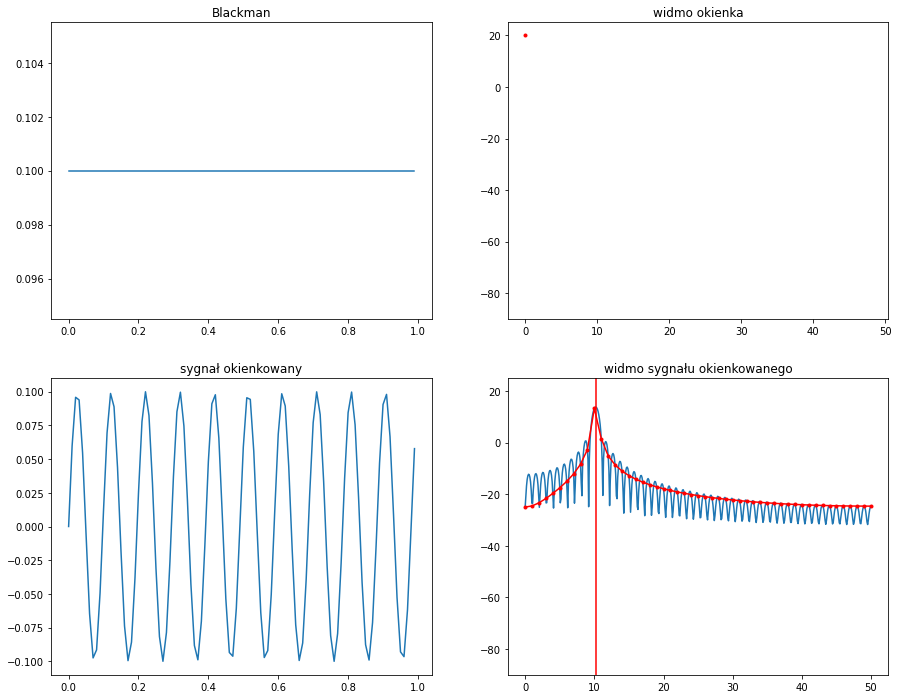

In [34]:
okn = np.blackman(len(s))
rysuj_wlasnosci_okienka(s, okn, 128, Fs, "Blackman")

### Zadanie: Wpływ okienkowania na wykrywalność składowych o różnej amplitudzie
Wygeneruj sygnał będący sumą dwóch sinusoid o:
* fazie 0,
* czasie trwania $T=1$ s, i 
* częstości próbkowania $Fs=1024$ Hz. 
* Jedna niech ma częstość $f=210.3$ Hz. 
* Częstość drugiej, niech zmienia się  od 285 do 300 Hz w 9 krokach.
* Amplituda pierwszej mniech będzie 100 a
* druga niech będzie 1 (będziemy ją też potem zmieniać).

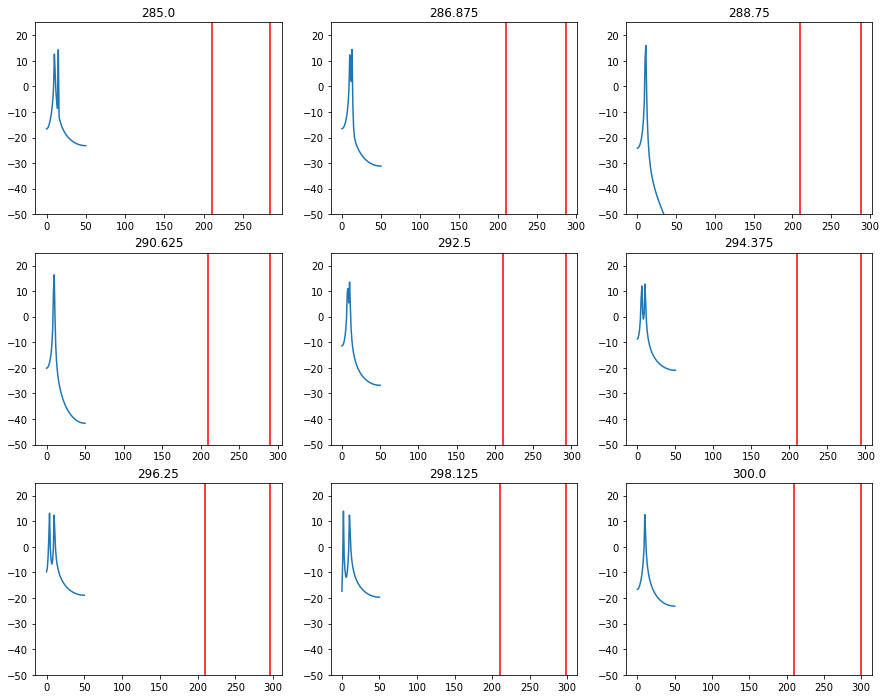

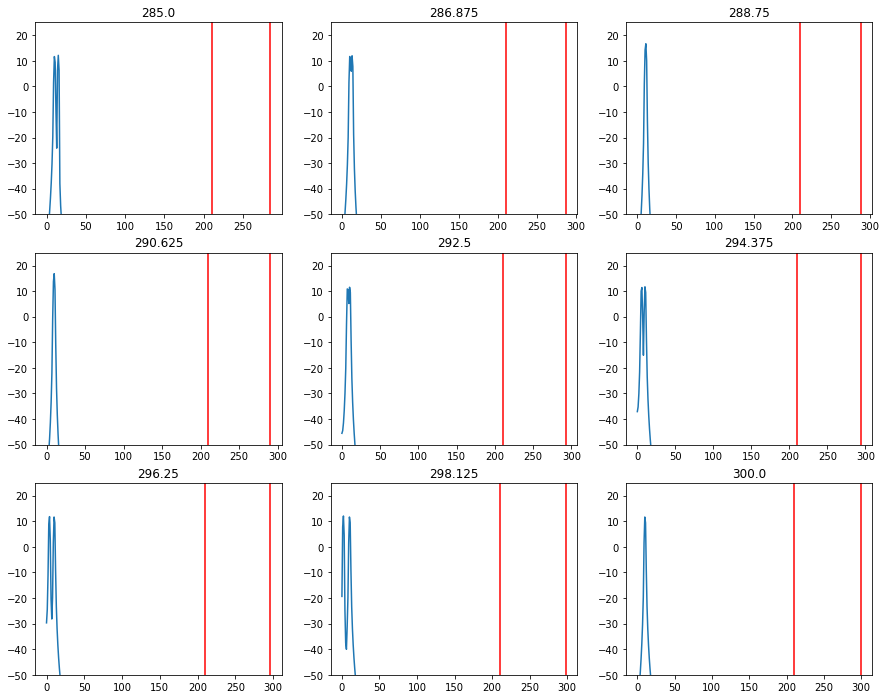

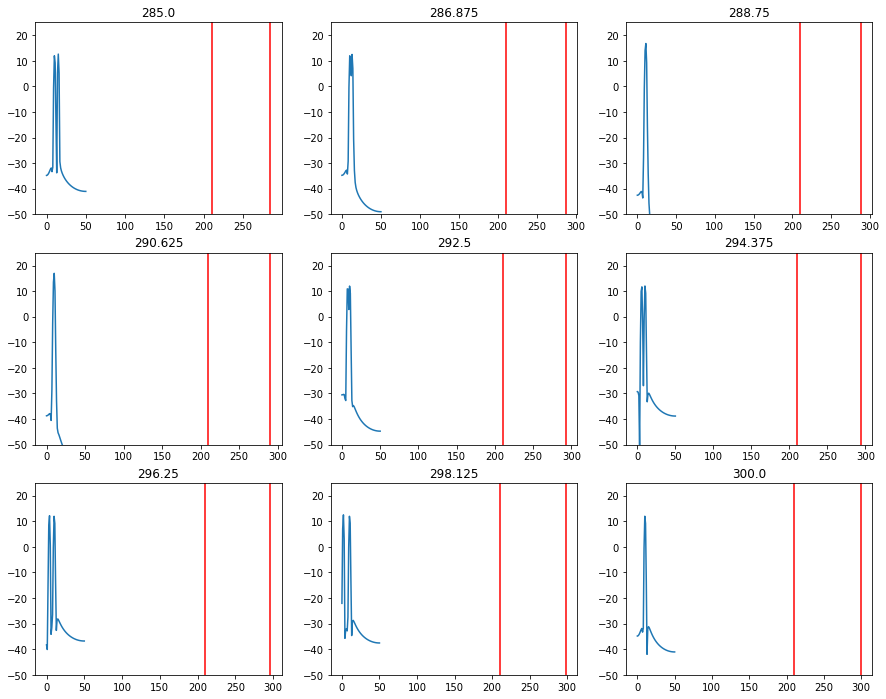

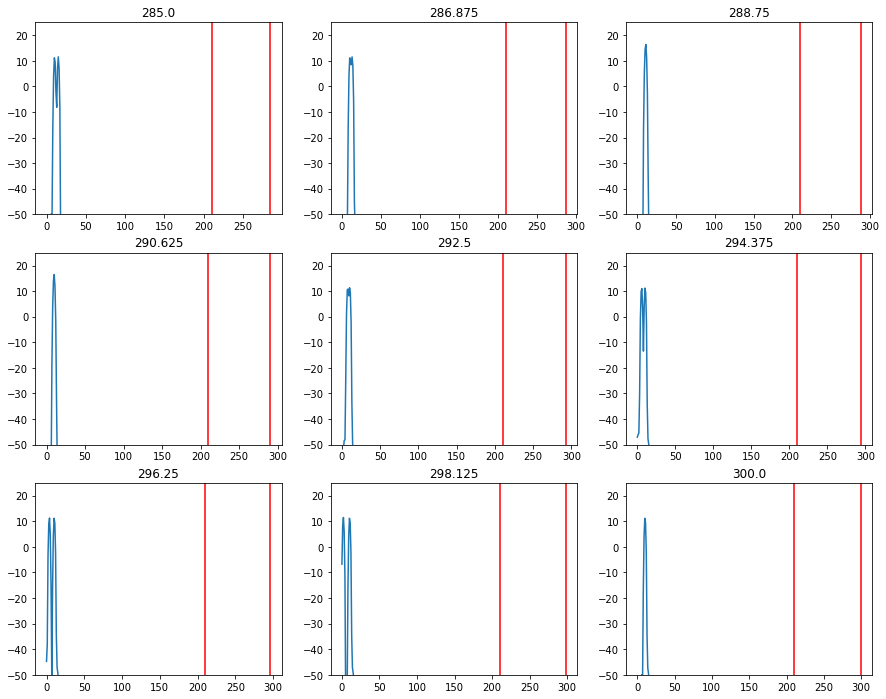

In [40]:

def testuj_rozdzielczosc(t, F_samp, okno, tytul ):
    '''
    prezentacja własności
    '''
    plt.figure(figsize=(15,12))
    f1 = 210.3
    s1 = np.sin(2*np.pi*f1*t) # sinusoida o częstości f1
    okno = okno/np.linalg.norm(okno)
    k = 1
    for f2 in np.linspace(285,300,9):
        s2 = np.sin(2*np.pi*f2*t) # sinusioda o częstości f2
        s = s1 + s2 # suma sinusoid o częstościach f1 i f2
        s_okienkowany = s* okno # tu okienkujemy sygnał s
        plt.subplot(3,3,k)
        plt.title(str(f2))
        S_okienkowany, skalaF = widmo_dB(s_okienkowany,len(s), Fs)
        plt.plot(skalaF,S_okienkowany)
        # dorysowujemy pionowe linie w miejscach gdzie są częstości nasych sinusoid:
        plt.plot([f1,f1],[-50,25],'r') 
        plt.plot([f2,f2],[-50,25],'r')
        plt.ylim((-50,25))
        k+=1
    plt.show()
    
Fs = 100
dt = 1/Fs
T = 1
t = np.arange(0,T,dt)

M = len(t)
okno = np.ones(M)
testuj_rozdzielczosc(t,Fs, okno,'prostokąt')

okno = ss.windows.hann(M)#
testuj_rozdzielczosc(t,Fs, okno,'hanning')

# przetestuj okno hamming
okno = np.hamming(M)
testuj_rozdzielczosc(t,Fs, okno,'hamming')
# przetestuj okno blackmana:
okno = np.blackman(M)
testuj_rozdzielczosc(t,Fs, okno,'blackman')

## Okienkować możemy też w częstości
Koncepcyjnie najprostszym filtrem jest operacja przemnożenia widma sygnału przez okienko w dziedzinie częstości a następnie zastosowanie odwrotnej transformaty Fouriera. Co stanie się z sygnałem w dziedzinie czasu, a co w dziedzinie częstości, jeśli chcielibyśmy przefiltrować go pasmowo przy użyciu takiego filtra pasmowo przepustowego ?

### Zadanie 4: Konstrukcja prostego filtru
* Zróbmy oś częstości, zakładając że ma ona zakres od 0 do 128 Hz (włącznie) i odstęp między częstościami 1 Hz:

In [41]:
F = np.arange(0,129,1)

* Zróbmy okno prostokątne w częstościach od 21 do 30:

In [42]:
S_prost= np.zeros(129,dtype = complex)
S_prost[21:31]=1

* Proszę wykreślić to okienko w dziedzinie częstości:

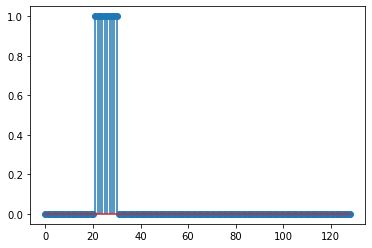

In [43]:
plt.stem(F, np.abs(S_prost))
plt.show()

* Następnie obliczyć odwrotną transformację Fouriera i wykreślić odpowiadający mu sygnał w dziedzinie czasu (korzystamy z funkcji `irfft`).

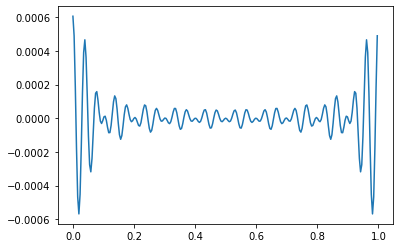

In [48]:
s_prost = np.fft.irfft(S_prost)/len(S_prost)
t = np.arange(0,1,1/256)
plt.plot(t,s_prost)
plt.show()

>Zgodnie z twierdzeniem o splocie, jeśli w dziedzinie czasu pomnożymy transformatę Fouriera sygnału przez rozważane okno prostokątne to w dziedzinie czasu dostaniemy splot sygnału z tym co widać na powyższym rysunku, czyli z odwrotną transformatą okienka.

Zobaczmy jakie to ma praktyczne konsekwencje. 

Zróbmy sygnał zerowy o długości 1 s próbkowany częstością 256 Hz. W chwili $t = 0.5$ s niech w tym sygnale będzie  delta kronekera (dodajemy 1 do stosownej próbki). Narysujmy ten sygnał:

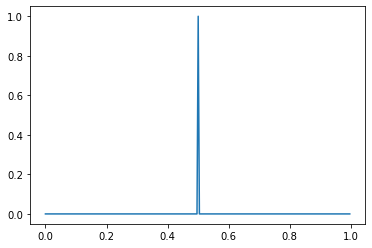

In [49]:
syg = np.zeros(len(t))
syg[t==0.5] =1
plt.plot(t,syg)
plt.show()

Następnie obliczmy transformatę Fouriera tego sygnału (`rfft`):

In [51]:
S_syg = np.fft.rfft(syg)

Pomnóżmy tą transformatę przez okno prostokątne `S_prost`:

In [52]:
oknowana = S_syg*S_prost

Obliczmy odwrotną transformatę Fouriera (`irfft` ) i narysujmy otrzymany sygnał w czasie: 

In [53]:
odwrotna = np.fft.irfft(oknowana)

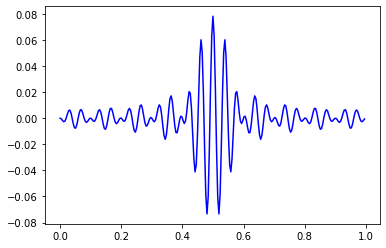

In [54]:
plt.plot(t,odwrotna,'b')
plt.show()

Jeśli o powyższej procedurze myślimy jako o filtrze, to powyższy sygnał jest odpowiedzią impulsową tego filtra. 

Zauważmy, że jest to splot syganłu (delty) z odwrotną transformatą okienka.

# Co musimy z tego zapamiętać?
* Jeśli nic nie zrobimy z sygnałem, to okienkujemy go okienkiem prostokątnym.
* Okienkowanie w czasie odpowiada splotowi transformaty sygnału z transformatą okienka.
* Okienka różnią się szerokością piku głównego i szybkością zanikania listków bocznych.
* Obecność listków prowadzi do "wycieku" mocy z piku głównego.
* Wolno zanikające listki boczne mogą utrudniać interpretację składu częstotliwościowego sygnału. 